Student: Mariam Valladares-Castellanos 

## **Final Project: Automating Historic Nutrient Delivery Model Calibration to Assess Nutrient Retention Services in Puerto Rico**

**Summary**: The following notebook described the process to calibrate the InVEST (Integrated Valuation of Ecosystem Services and
Tradeoffs) Nutrient Delivery Ratio Model. The first steps relate to the preparation of the environment and prerequirements to meet to install the 
package. Then, applies the calibration function for one parameter of the model for 1951 and 2000, the threshold flow accumulation (TFA) used by the model to map the
stream network and therefore the water flow routes in which nutrients move. Finally, I included the code to create the figures to visualize the model outcomes.

#### 1. List of the preprocessing steps to use the InVEST NDR model in Python

In [ ]:
#In anaconda prompt
#Create a new environment
!conda create -n  myclone-env

#Activate the invest-environment
!conda activate  myclone-env

*Note*: Make sure jupyther lab is install in the invest-env environment before launch it

In [ ]:
#Install conda-channel (github.com/conda-forge/natcap.invest-feestock) 
# or add in app channel with the link https://conda.anaconda.org/conda-forge/
!conda config --add channels conda-forge

In [ ]:
#install packages (dependencies)
# or in anaconda app
!pip install gdal

*Note*: Install "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/'

In [1]:
#install natcap invest
# or in anaconda app
!!pip install natcap.invest

['Unable to create process using \'C:\\Users\\Mariam Valladares\\.conda\\envs\\invest-env\\python.exe "C:\\Users\\Mariam Valladares\\.conda\\envs\\invest-env\\Scripts\\pip-script.py" install natcap.invest\'']

*Note*: After install the package restart the kernel

In [121]:
## The necessary packages 
import logging
import sys

import natcap.invest.ndr.ndr
import natcap.invest.utils

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#### 2. Description of the baseline code to run the NDR model with one calibration value.

In [ ]:
#Model: Nutrient Delivery Ratio
## Set up the model parameters and arguments
LOGGER = logging.getLogger(__name__)
root_logger = logging.getLogger()

handler = logging.StreamHandler(sys.stdout)
formatter = logging.Formatter(
    fmt=natcap.invest.utils.LOG_FMT,
    datefmt='%m/%d/%Y %H:%M:%S ')
handler.setFormatter(formatter)
logging.basicConfig(level=logging.INFO, handlers=[handler])

#Set up the location of the source files for each input of the model
args = {
    'biophysical_table_path': 'C:\\Users\\mvalla3\\Dropbox\\PC\\Desktop\\Aplicaciones\\LSU '
                              'Research\\Chapter 2 Fragmentation and land '
                              'cover\\INVEST\\Batch Calibartion '
                              'NDR\\Inputs\\NDR_biophys_table_summarize.csv',
    'calc_n': True,
    'calc_p': True,
    'dem_path': 'C:\\Users\\mvalla3\\Dropbox\\PC\\Desktop\\Aplicaciones\\LSU '
                'Research\\Chapter 2 Fragmentation and land '
                'cover\\INVEST\\Batch Calibartion '
                'NDR\\Inputs\\DEM\\DEMFill_ASTER.tif',
    'k_param': '2',
    'lulc_path': 'C:\\Users\\mvalla3\\Dropbox\\PC\\Desktop\\Aplicaciones\\LSU '
                 'Research\\Chapter 2 Fragmentation and land '
                 'cover\\INVEST\\Batch Calibartion NDR\\Inputs\\LULC '
                 '1951-2000\\LULC_2000.tif',
    'n_workers': '-1',
    'results_suffix': '_accumT50',
    'runoff_proxy_path': 'C:\\Users\\mvalla3\\Dropbox\\PC\\Desktop\\Aplicaciones\\LSU '
                         'Research\\Chapter 2 Fragmentation and land '
                         'cover\\INVEST\\Batch Calibartion '
                         'NDR\\Inputs\\RunoffProxy\\Q_mm_43.tif',
    'subsurface_critical_length_n': '200',
    'subsurface_eff_n': '0',
    'threshold_flow_accumulation': '50',   #Example with fix value to the TFA parameter
    'watersheds_path': 'C:\\Users\\mvalla3\\Dropbox\\PC\\Desktop\\Aplicaciones\\LSU '
                       'Research\\Chapter 2 Fragmentation and land '
                       'cover\\INVEST\\Batch Calibartion NDR\\Inputs\\Drainage '
                       'areas Group\\Ref_WA_Cluster1.shp',
    'workspace_dir': 'C:\\Users\\mvalla3\\Dropbox\\PC\\Desktop\\Aplicaciones\\LSU '
                     'Research\\Chapter 2 Fragmentation and land '
                     'cover\\INVEST\\Batch Calibartion '
                     'NDR\\Cluster1_Output_2000',
}

## Run the model
if __name__ == '__main__':
    natcap.invest.ndr.ndr.execute(args)

#### 2. Start Batch Calibration for TFA for one group of watersheds (sites with similar characteristics) for 1951

In [10]:
#####Watershed Cluster 1

In [3]:
## set up the parameters and folder location
#Preparing to test TFA changes with only one cluster of watersheds (cluster 1) for 1951 LULC 
LOGGER = logging.getLogger(__name__)
root_logger = logging.getLogger()

handler = logging.StreamHandler(sys.stdout)
formatter = logging.Formatter(
    fmt=natcap.invest.utils.LOG_FMT,
    datefmt='%m/%d/%Y %H:%M:%S ')
handler.setFormatter(formatter)
logging.basicConfig(level=logging.INFO, handlers=[handler])

args = {
    'biophysical_table_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/NDR_biophys_table_summarize.csv',
    'calc_n': True,
    'calc_p': True,
    'dem_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/DEM/DEMFill_ASTER.tif',
    'k_param': '2',
    'lulc_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/LULC 1951-2000/LULC_1951.tif',
    'runoff_proxy_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/RunoffProxy/Q_mm_43.tif',
    'subsurface_critical_length_n': '200',
    'subsurface_eff_n': '0',
    'watersheds_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/Drainage areas Group/Ref_WA_Cluster1.shp',
    'workspace_dir': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Cluster1_Output_1951',
}

# Test to evaluate one parameter iteration for the calibration process for TFA Between 50 and 200
if __name__ == '__main__':
    #Loops through the values 50 to 3000
    for threshold_flow_accumulation in range(50, 200, 50):
        #set the accumulation threshold to the current value in the loop
        args['threshold_flow_accumulation'] = threshold_flow_accumulation
        #set the suffix to be accum### for the current threshold_flow_accumulation
        args['results_suffix'] = 'accum_1951_' + str(threshold_flow_accumulation)
        natcap.invest.ndr.ndr.execute(args)

12/04/2024 15:33:37  (pygeoprocessing.geoprocessing) geoprocessing.reproject_vector(2238) INFO starting reprojection
12/04/2024 15:33:37  (pygeoprocessing.geoprocessing) geoprocessing.reproject_vector(2286) INFO reprojection 100.0% complete on watershed_results_ndr_accum_1951_50.gpkg
12/04/2024 15:33:38  (pygeoprocessing.geoprocessing) geoprocessing.align_and_resize_raster_stack(1142) INFO 1 of 3 aligned: aligned_dem_accum_1951_50.tif
12/04/2024 15:33:38  (pygeoprocessing.geoprocessing) geoprocessing.align_and_resize_raster_stack(1142) INFO 2 of 3 aligned: aligned_lulc_accum_1951_50.tif
12/04/2024 15:33:38  (pygeoprocessing.geoprocessing) geoprocessing.align_and_resize_raster_stack(1142) INFO 3 of 3 aligned: aligned_runoff_proxy_accum_1951_50.tif
12/04/2024 15:33:38  (pygeoprocessing.geoprocessing) geoprocessing.align_and_resize_raster_stack(1146) INFO aligned all 3 rasters.
12/04/2024 15:33:39  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(428) INFO starting stats_wo

C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


12/04/2024 15:33:40  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:33:40  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:33:40  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(428) INFO starting stats_worker
12/04/2024 15:33:40  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(434) INFO started stats_worker <Thread(Thread-7 (stats_worker), started daemon 29232)>
12/04/2024 15:33:40  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:33:40  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:33:49  (pygeoprocessing.routing.routing) Task._call(1093) INFO (fill pits): complete
12/04/2024 15:34:18  (pygeoprocessing.routing.routing) Task._call(1093) INFO 0.0% complete
12/04/2024 15:34:21  (pygeopr

C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


12/04/2024 15:36:01  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:36:01  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:36:01  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(428) INFO starting stats_worker
12/04/2024 15:36:01  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(434) INFO started stats_worker <Thread(Thread-37 (stats_worker), started daemon 12520)>
12/04/2024 15:36:01  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:36:01  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:36:11  (pygeoprocessing.routing.routing) Task._call(1093) INFO (fill pits): complete
12/04/2024 15:36:42  (pygeoprocessing.routing.routing) Task._call(1093) INFO 0.0% complete
12/04/2024 15:36:47  (pygeop

C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


12/04/2024 15:38:35  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:38:35  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:38:35  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(428) INFO starting stats_worker
12/04/2024 15:38:35  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(434) INFO started stats_worker <Thread(Thread-67 (stats_worker), started daemon 21988)>
12/04/2024 15:38:35  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:38:35  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:38:45  (pygeoprocessing.routing.routing) Task._call(1093) INFO (fill pits): complete
12/04/2024 15:39:17  (pygeoprocessing.routing.routing) Task._call(1093) INFO 0.0% complete
12/04/2024 15:39:21  (pygeop

In [4]:
##### Watershed Cluster 2

In [5]:
args = {
    'biophysical_table_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/NDR_biophys_table_summarize.csv',
    'calc_n': True,
    'calc_p': True,
    'dem_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/DEM/DEMFill_ASTER.tif',
    'k_param': '2',
    'lulc_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/LULC 1951-2000/LULC_1951.tif',
    'runoff_proxy_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/RunoffProxy/Q_mm_43.tif',
    'subsurface_critical_length_n': '200',
    'subsurface_eff_n': '0',
    'watersheds_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/Drainage areas Group/Ref_WA_Cluster2.shp',
    'workspace_dir': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Cluster2_Output_1951',
}

# Test to evaluate one parameter iteration for the calibration process for TFA Between 50 and 200
if __name__ == '__main__':
    #Loops through the values 50 to 3000
    for threshold_flow_accumulation in range(50, 200, 50):
        #set the accumulation threshold to the current value in the loop
        args['threshold_flow_accumulation'] = threshold_flow_accumulation
        #set the suffix to be accum### for the current threshold_flow_accumulation
        args['results_suffix'] = 'accum_1951_' + str(threshold_flow_accumulation)
        natcap.invest.ndr.ndr.execute(args)

12/04/2024 15:44:42  (pygeoprocessing.geoprocessing) geoprocessing.reproject_vector(2238) INFO starting reprojection
12/04/2024 15:44:42  (pygeoprocessing.geoprocessing) geoprocessing.reproject_vector(2286) INFO reprojection 100.0% complete on watershed_results_ndr_accum_1951_50.gpkg
12/04/2024 15:44:43  (pygeoprocessing.geoprocessing) geoprocessing.align_and_resize_raster_stack(1142) INFO 1 of 3 aligned: aligned_dem_accum_1951_50.tif
12/04/2024 15:44:44  (pygeoprocessing.geoprocessing) geoprocessing.align_and_resize_raster_stack(1142) INFO 2 of 3 aligned: aligned_lulc_accum_1951_50.tif
12/04/2024 15:44:44  (pygeoprocessing.geoprocessing) geoprocessing.align_and_resize_raster_stack(1142) INFO 3 of 3 aligned: aligned_runoff_proxy_accum_1951_50.tif
12/04/2024 15:44:44  (pygeoprocessing.geoprocessing) geoprocessing.align_and_resize_raster_stack(1146) INFO aligned all 3 rasters.
12/04/2024 15:44:45  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(428) INFO starting stats_wo

C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


12/04/2024 15:44:46  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:44:46  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:44:46  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(428) INFO starting stats_worker
12/04/2024 15:44:46  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(434) INFO started stats_worker <Thread(Thread-97 (stats_worker), started daemon 31816)>
12/04/2024 15:44:46  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:44:46  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:44:57  (pygeoprocessing.routing.routing) Task._call(1093) INFO (fill pits): 6386176 of 7907796 pixels complete
12/04/2024 15:44:57  (pygeoprocessing.routing.routing) Task._call(1093) INFO (fill pits): com

C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


12/04/2024 15:48:03  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:48:03  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:48:03  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(428) INFO starting stats_worker
12/04/2024 15:48:03  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(434) INFO started stats_worker <Thread(Thread-127 (stats_worker), started daemon 11308)>
12/04/2024 15:48:03  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:48:03  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:48:14  (pygeoprocessing.routing.routing) Task._call(1093) INFO (fill pits): 7658496 of 7907796 pixels complete
12/04/2024 15:48:14  (pygeoprocessing.routing.routing) Task._call(1093) INFO (fill pits): co

C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


12/04/2024 15:51:22  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:51:22  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:51:23  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(428) INFO starting stats_worker
12/04/2024 15:51:23  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(434) INFO started stats_worker <Thread(Thread-157 (stats_worker), started daemon 33144)>
12/04/2024 15:51:23  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(513) INFO 100.0% complete
12/04/2024 15:51:23  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(516) INFO Waiting for raster stats worker result.
12/04/2024 15:51:34  (pygeoprocessing.routing.routing) Task._call(1093) INFO (fill pits): 7659520 of 7907796 pixels complete
12/04/2024 15:51:34  (pygeoprocessing.routing.routing) Task._call(1093) INFO (fill pits): co

RuntimeError: TIFFAppendToStrip:Write error at scanline 1335

#### 2. Start Batch Calibration for TFA for one group of watersheds (sites with similar characteristics) for 2000

In [11]:
####Watershed Cluster 1

In [2]:
args = {
    'biophysical_table_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/NDR_biophys_table_summarize.csv',
    'calc_n': True,
    'calc_p': True,
    'dem_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/DEM/DEMFill_ASTER.tif',
    'k_param': '2',
    'lulc_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/LULC 1951-2000/LULC_2000.tif',
    'runoff_proxy_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/RunoffProxy/Q_mm_43.tif',
    'subsurface_critical_length_n': '200',
    'subsurface_eff_n': '0',
    'watersheds_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/Drainage areas Group/Ref_WA_Cluster1.shp',
    'workspace_dir': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Cluster1_Output_2000',
}

# Test to evaluate one parameter iteration for the calibration process for TFA Between 50 and 200
if __name__ == '__main__':
    #Loops through the values 50 to 3000
    for threshold_flow_accumulation in range(50, 200, 50):
        #set the accumulation threshold to the current value in the loop
        args['threshold_flow_accumulation'] = threshold_flow_accumulation
        #set the suffix to be accum### for the current threshold_flow_accumulation
        args['results_suffix'] = 'accum_2000_' + str(threshold_flow_accumulation)
        natcap.invest.ndr.ndr.execute(args)

C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


In [3]:
####Watershed Cluster 2

In [4]:
args = {
    'biophysical_table_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/NDR_biophys_table_summarize.csv',
    'calc_n': True,
    'calc_p': True,
    'dem_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/DEM/DEMFill_ASTER.tif',
    'k_param': '2',
    'lulc_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/LULC 1951-2000/LULC_2000.tif',
    'runoff_proxy_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/RunoffProxy/Q_mm_43.tif',
    'subsurface_critical_length_n': '200',
    'subsurface_eff_n': '0',
    'watersheds_path': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Inputs/Drainage areas Group/Ref_WA_Cluster2.shp',
    'workspace_dir': 'C:/Users/mvalla3/Documents/Batch Calibartion NDR/Cluster2_Output_2000',
}

# Test to evaluate one parameter iteration for the calibration process for TFA Between 50 and 200
if __name__ == '__main__':
    #Loops through the values 50 to 3000
    for threshold_flow_accumulation in range(50, 200, 50):
        #set the accumulation threshold to the current value in the loop
        args['threshold_flow_accumulation'] = threshold_flow_accumulation
        #set the suffix to be accum### for the current threshold_flow_accumulation
        args['results_suffix'] = 'accum_2000_' + str(threshold_flow_accumulation)
        natcap.invest.ndr.ndr.execute(args)

C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
C:\Users\mvalla3\AppData\Local\anaconda3\envs\myclone-env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


#### 4. Contructions of visualizations

Using the previous output tables and maps for 1951 and 2000. The columns in each dataset beggining with Nexp_X or Pexp_X refer to the model predictions, X refers to the value of the parameter being calibrated, and RefN_X/RefP_X refers to the reference nutrient observations from the water quality portal (WQP). The cluster column refer to groups of watersheds with similar characteristics.

#### 4.1 Overview of the Data

In [122]:
##read the data 1951
data_1951 = pd.read_csv('C:/Users/mvalla3/Dropbox/PC/Desktop/Aplicaciones/LSU Research/Chapter 2 Fragmentation and land cover/INVEST/Batch Calibartion NDR/Data_1951.csv',  sep = ',', index_col = 'Name')
data_1951.head()

,cluster,Nexp_50,Pexp_50,Nexp_100,Pexp_100,Nexp_150,Pexp_150,Year,KJ_NkgYear,NIT_NKgYear,RefTot_PhosKgYear,RefTot_NKgYear
Name,,,,,,,,,,,,
USGS-50048800,1,98.758040,18.797353,110.043013,20.944276,112.773062,21.624603,1951,191478.620100,67395.48004,NaN,258874.100100
USGS-50049100,1,290.957893,60.262259,307.039224,63.323024,321.128727,66.225174,1951,332754.086300,77404.85585,54904.327970,410158.942200
USGS-50047545,1,8.972440,1.708909,8.898960,1.694822,8.806539,1.677112,1951,680.793659,NaN,62.372315,680.793659
USGS-50047535,1,3.661190,0.696167,3.706847,0.704582,4.019180,0.763570,1951,749.965181,NaN,196.108626,749.965181
USGS-50047540,1,5.462842,1.039160,5.981962,1.138005,8.085442,1.538570,1951,1977.159719,NaN,599.244416,1977.159719


In [123]:
#Data 2000
data_2000 = pd.read_csv('C:/Users/mvalla3/Dropbox/PC/Desktop/Aplicaciones/LSU Research/Chapter 2 Fragmentation and land cover/INVEST/Batch Calibartion NDR/Data_2000.csv' ,sep = ','  , index_col = 'Name')
data_2000.head()

,cluster,Nexp_50,Pexp_50,Nexp_100,Pexp_100,Nexp_150,Pexp_150,Year,KJ_NkgYear,NIT_NKgYear,RefTot_PhosKgYear,RefTot_NKgYear
Name,,,,,,,,,,,,
USGS-50048800,1,261.012817,66.547619,284.180495,72.498403,335.766982,85.777542,2000,101414.998200,60925.92069,NaN,162340.918900
USGS-50049100,1,881.734472,227.412188,939.101208,242.204500,1012.176642,261.022478,2000,86377.206390,45431.45975,14825.007690,131808.666100
USGS-50047545,1,4.084763,0.867260,4.208219,0.900518,4.640120,1.013797,2000,539.139199,NaN,49.621799,539.139199
USGS-50047535,1,1.419321,0.358115,1.725718,0.437074,2.525073,0.640289,2000,540.662725,NaN,111.563081,540.662725
USGS-50047540,1,4.302872,1.063769,4.222697,1.042746,3.998990,0.973842,2000,2249.667422,NaN,575.233145,2249.667422


**Boxplots InVEST Model Estimates**: Figures representing Invest model estimates of Nitrogen and Phosphorus predictions for 1951 and 2000 using three calibration values for the paramter TFA

In [6]:
#### Prepare datasets

In [124]:
# Separate the columns into N and P groups
columns_N = ["cluster", "Nexp_50", "Nexp_100", "Nexp_150"]
columns_P = ["cluster", "Pexp_50", "Pexp_100", "Pexp_150"]

# Melt the data for seaborn compatibility
df_N1951 = data_1951[columns_N].melt(id_vars="cluster", var_name="Category", value_name="Value")
df_N1951["Type"] = "1951 Nitrogen (N)"
df_N1951["Year"] = "1951"

df_P1951 = data_1951[columns_P].melt(id_vars="cluster", var_name="Category", value_name="Value")
df_P1951["Type"] = "1951 Phosphorus (P)"
df_P1951["Year"] = "1951"

df_N2000 = data_2000[columns_N].melt(id_vars="cluster", var_name="Category", value_name="Value")
df_N2000["Type"] = "2000 Nitrogen (N)"
df_N2000["Year"] = "2000"

df_P2000 = data_2000[columns_P].melt(id_vars="cluster", var_name="Category", value_name="Value")
df_P2000["Type"] = "2000 Phosphorus (P)"
df_P2000["Year"] = "2000"

# Combine both datasets

df_summaryN = pd.concat([df_N1951, df_N2000])
df_summaryP = pd.concat([df_P1951, df_P2000])
df_summaryN
#df_summary.index = ["N - " + col for col in df_N1951.index] + ["P - " + col for col in df_P1951.index] +["N - " + col for col in df_P2000.index]+ + ["P - " + col for col in df_P2000.index]


,cluster,Category,Value,Type,Year
0,1,Nexp_50,98.758040,1951 Nitrogen (N),1951
1,1,Nexp_50,290.957893,1951 Nitrogen (N),1951
2,1,Nexp_50,8.972440,1951 Nitrogen (N),1951
3,1,Nexp_50,3.661190,1951 Nitrogen (N),1951
4,1,Nexp_50,5.462842,1951 Nitrogen (N),1951
...,...,...,...,...,...
121,2,Nexp_150,735.302572,2000 Nitrogen (N),2000
122,2,Nexp_150,191.076266,2000 Nitrogen (N),2000
123,2,Nexp_150,67.009960,2000 Nitrogen (N),2000
124,2,Nexp_150,309.221091,2000 Nitrogen (N),2000


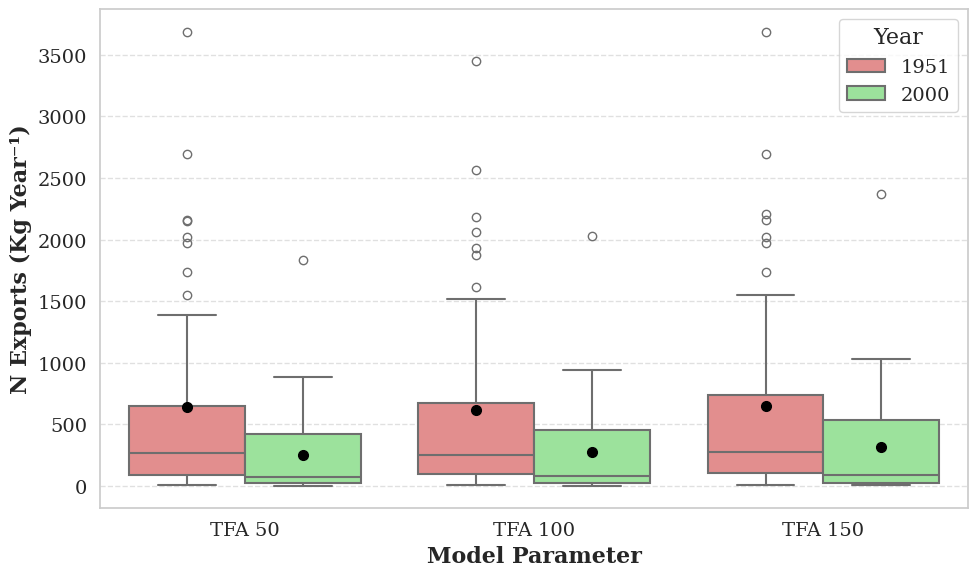

In [132]:
#box plot 1951-2000 Nitrogen Model Estimates
# Set style with a color-blind friendly palette (Color Universal Design)
sns.set(style="whitegrid", font_scale=1.5)
plt.rcParams.update({
    'font.size': 14,            # Font size for axes labels and titles
    'axes.labelsize': 16,       # Font size for axes labels
    'axes.titlesize': 18,       # Font size for the plot title
    'xtick.labelsize': 14,      # Font size for x-axis ticks
    'ytick.labelsize': 14,      # Font size for y-axis ticks
    'legend.fontsize': 14,      # Font size for legend
    'figure.figsize': (10, 6),  # Figure size
    'axes.grid': True,          # Show grid lines
    'grid.linestyle': '--',     # Style of grid lines
    'grid.alpha': 0.6,          # Transparency of grid lines
    'font.family': 'serif',     # Font type
})

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Category", 
    y="Value", 
    hue="Year", 
    data=df_summaryN, #data_1951_melted, 
    #palette="Set2", 
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 7},
    palette={ 
        '1951': 'lightcoral',  # Light red fill for Group1
        '2000': 'lightgreen',  # Light green fill for Group2
    },
    linewidth=1.5  # Line width for the boxes
)



# Customize the plot title, labels, and legend
#plt.title("Nitrogen Exports by Year", fontsize=18, fontweight='bold')
plt.xlabel("Model Parameter", fontsize=16, fontweight='bold')
plt.ylabel("N Exports (Kg Year⁻¹)", fontsize=16, fontweight='bold')
plt.legend(title="Year", fontsize=14, title_fontsize=16)

# Update x-tick labels to match the new categories
plt.xticks([0, 1, 2], ["TFA 50", "TFA 100", "TFA 150"])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Figure 1. Comparisson of the InVEST NDR Nitrogen Export estimates between 1951 and 2000 using three values of TFA.

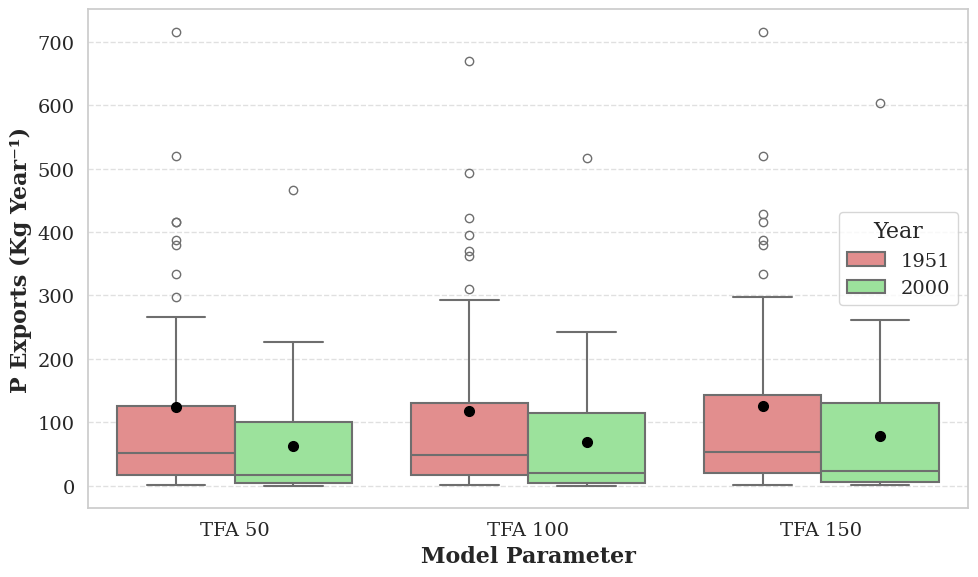

In [107]:
#box plot 1951-2000 Phosphorus model estimates
# Set style with a color-blind friendly palette (Color Universal Design)
sns.set(style="whitegrid", font_scale=1.5)
plt.rcParams.update({
    'font.size': 14,            # Font size for axes labels and titles
    'axes.labelsize': 16,       # Font size for axes labels
    'axes.titlesize': 18,       # Font size for the plot title
    'xtick.labelsize': 14,      # Font size for x-axis ticks
    'ytick.labelsize': 14,      # Font size for y-axis ticks
    'legend.fontsize': 14,      # Font size for legend
    'figure.figsize': (10, 6),  # Figure size
    'axes.grid': True,          # Show grid lines
    'grid.linestyle': '--',     # Style of grid lines
    'grid.alpha': 0.6,          # Transparency of grid lines
    'font.family': 'serif',     # Font type
})


# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Category", 
    y="Value", 
    hue="Year", 
    data=df_summaryP, #data_1951_melted, 
    #palette="Set2", 
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 7},
    palette={ 
        '1951': 'lightcoral',  # Light red fill for Group1
        '2000': 'lightgreen',  # Light green fill for Group2
    },
    linewidth=1.5  # Line width for the boxes
)



# Customize the plot title, labels, and legend
#plt.title("Nitrogen Exports by Year", fontsize=18, fontweight='bold')
plt.xlabel("Model Parameter", fontsize=16, fontweight='bold')
plt.ylabel("P Exports (Kg Year⁻¹)", fontsize=16, fontweight='bold')
plt.legend(title="Year", fontsize=14, title_fontsize=16)

# Update x-tick labels to match the new categories
plt.xticks([0, 1, 2], ["TFA 50", "TFA 100", "TFA 150"])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Figure 2. Comparisson of the InVEST NDR Phosphorus Export estimates between 1951 and 2000 using three values of TFA.

**Boxplots WQP Observed**: Figures representing Field Observations of Nitrogen and Phosphorus predictions for 1951 and 2000.

In [109]:
###WQP Data
# Separate the columns into N and P groups
columns_N = ["cluster", "RefTot_NKgYear"]
columns_P = ["cluster", "RefTot_PhosKgYear"]

# Melt the data for seaborn compatibility
df_N1951 = data_1951[columns_N].melt(id_vars="cluster", var_name="Category", value_name="Value")
df_N1951["Type"] = "1951 WQP Nitrogen (N)"
df_N1951["Year"] = "1951"

df_P1951 = data_1951[columns_P].melt(id_vars="cluster", var_name="Category", value_name="Value")
df_P1951["Type"] = "1951 WQP Phosphorus (P)"
df_P1951["Year"] = "1951"

df_N2000 = data_2000[columns_N].melt(id_vars="cluster", var_name="Category", value_name="Value")
df_N2000["Type"] = "2000 WQP Nitrogen (N)"
df_N2000["Year"] = "2000"

df_P2000 = data_2000[columns_P].melt(id_vars="cluster", var_name="Category", value_name="Value")
df_P2000["Type"] = "2000 WQP Phosphorus (P)"
df_P2000["Year"] = "2000"

# Combine both datasets

df_summaryN = pd.concat([df_N1951, df_N2000])
df_summaryP = pd.concat([df_P1951, df_P2000])
df_summaryP
#df_summary.index = ["N - " + col for col in df_N1951.index] + ["P - " + col for col in df_P1951.index] +["N - " + col for col in df_P2000.index]+ + ["P - " + col for col in df_P2000.index]


,cluster,Category,Value,Type,Year
0,1,RefTot_PhosKgYear,NaN,1951 WQP Phosphorus (P),1951
1,1,RefTot_PhosKgYear,54904.327970,1951 WQP Phosphorus (P),1951
2,1,RefTot_PhosKgYear,62.372315,1951 WQP Phosphorus (P),1951
3,1,RefTot_PhosKgYear,196.108626,1951 WQP Phosphorus (P),1951
4,1,RefTot_PhosKgYear,599.244416,1951 WQP Phosphorus (P),1951
...,...,...,...,...,...
37,2,RefTot_PhosKgYear,29177.842760,2000 WQP Phosphorus (P),2000
38,2,RefTot_PhosKgYear,4238.475841,2000 WQP Phosphorus (P),2000
39,2,RefTot_PhosKgYear,2407.934357,2000 WQP Phosphorus (P),2000
40,2,RefTot_PhosKgYear,26046.681310,2000 WQP Phosphorus (P),2000


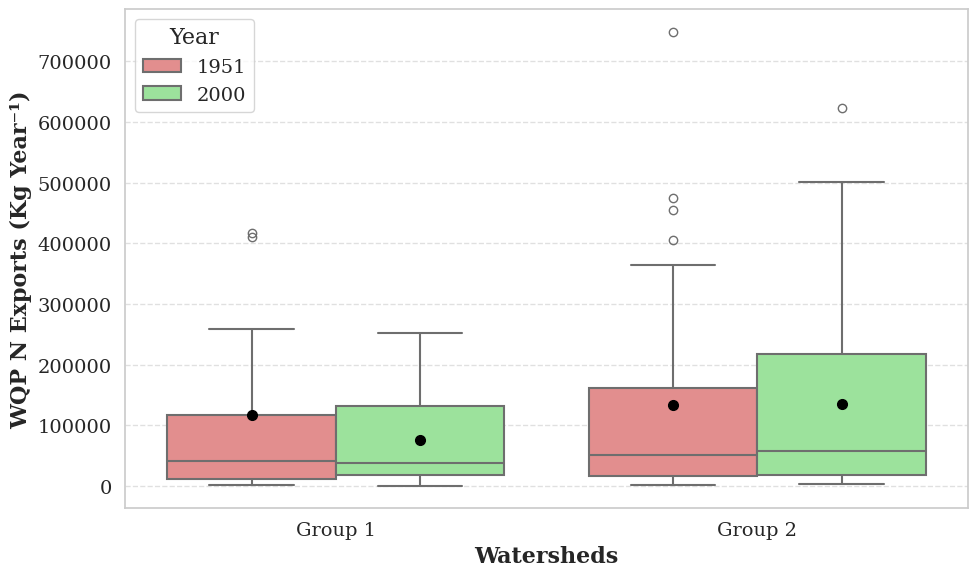

In [115]:
#box plot 1951-2000 N and P 
# Set style
# Set style with a color-blind friendly palette (Color Universal Design)
sns.set(style="whitegrid", font_scale=1.5)
plt.rcParams.update({
    'font.size': 14,            # Font size for axes labels and titles
    'axes.labelsize': 16,       # Font size for axes labels
    'axes.titlesize': 18,       # Font size for the plot title
    'xtick.labelsize': 14,      # Font size for x-axis ticks
    'ytick.labelsize': 14,      # Font size for y-axis ticks
    'legend.fontsize': 14,      # Font size for legend
    'figure.figsize': (10, 6),  # Figure size
    'axes.grid': True,          # Show grid lines
    'grid.linestyle': '--',     # Style of grid lines
    'grid.alpha': 0.6,          # Transparency of grid lines
    'font.family': 'serif',     # Font type
})


# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="cluster", 
    y= "Value", 
    hue="Year", 
    data=df_summaryN, #data_1951_melted, 
    #palette="Set2", 
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 7},
    palette={ 
        '1951': 'lightcoral',  # Light red fill for Group1
        '2000': 'lightgreen',  # Light green fill for Group2
    },
    linewidth=1.5  # Line width for the boxes
)



# Customize the plot title, labels, and legend
#plt.title("Nitrogen Exports by Year", fontsize=18, fontweight='bold')
plt.xlabel("Watersheds", fontsize=16, fontweight='bold')
plt.ylabel("WQP N Exports (Kg Year⁻¹)", fontsize=16, fontweight='bold')
plt.legend(title="Year", fontsize=14, title_fontsize=16)

# Update x-tick labels to match the new categories
plt.xticks([0, 1], ["Group 1", "Group 2"])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Figure 3. Differences in observed nitrogen exports between 1951 and 2000 for group 1 and group 2 of watersheds.

**Map Visualization**: Developed in ArcGIS Pro

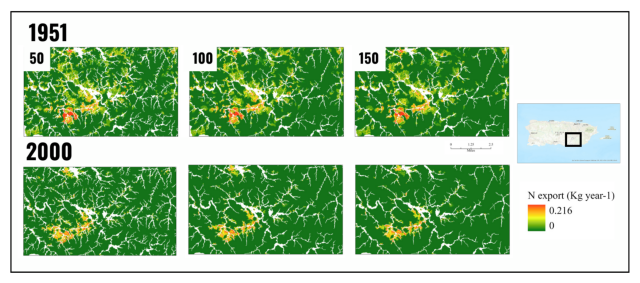

In [117]:
# Load the image
img = mpimg.imread('C:/Users/mvalla3/Dropbox/PC/Desktop/Aplicaciones/LSU Research/Chapter 2 Fragmentation and land cover/INVEST/Batch Calibartion NDR/InVEST Output Tables_maps/Figures/Figure 1_1951_2000.png')

# Display the image
plt.figure(figsize=(8, 8))  # Optional: Adjust figure size
plt.imshow(img)
plt.axis('off')  # Optional: Turn off the axis labels
plt.show()

Figure 4. Spatial representation of differences in the distribution of Nitrogen exports between 1951 and 2000 across three values of threshold flow accumulation (50, 100, 150).

**References**:

https://github.com/ligiambc/campanhao-and-ranieri-2023/blob/main/scriptF.py

https://invest.readthedocs.io/en/latest/scripting.html